In [ ]:
pip install pandas scikit-learn numpy
# Making changes to current   'adding more changes to it'

SyntaxError: invalid syntax (910988409.py, line 1)

In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming your data is in a csv file named 'data.csv'
data = pd.read_csv('TransformedData.csv')

# Convert year to int
data['Year'] = data['Year'].astype(int)

# Split the data into features (X) and targets (y)
X = data[['Year', 'Count_L', 'Count_S']]
y_mag = data['MAG']
y_5 = data['MAG5yr']
y_10 = data['MAG10yr']

# Split the dataset into training set and test set
X_train, X_test, y_train_mag, y_test_mag = train_test_split(X, y_mag, test_size=0.2, random_state=42)
_, _, y_train_5, y_test_5 = train_test_split(X, y_5, test_size=0.2, random_state=42)
_, _, y_train_10, y_test_10 = train_test_split(X, y_10, test_size=0.2, random_state=42)

# Train the SVM for MAG
model_mag = SVR(kernel='rbf', C=1e3, gamma=0.1)
model_mag.fit(X_train, y_train_mag)

# Train the SVM for 5 years
model_5 = SVR(kernel='rbf', C=1e3, gamma=0.1)
model_5.fit(X_train, y_train_5)

# Train the SVM for 10 years
model_10 = SVR(kernel='rbf', C=1e3, gamma=0.1)
model_10.fit(X_train, y_train_10)

# Make predictions
mag_pred = model_mag.predict(X_test)
mag5_pred = model_5.predict(X_test)
mag10_pred = model_10.predict(X_test)

# Calculate MSE
mse_mag = mean_squared_error(y_test_mag, mag_pred)
mse_mag5 = mean_squared_error(y_test_5, mag5_pred)
mse_mag10 = mean_squared_error(y_test_10, mag10_pred)

print("MSE for MAG:", mse_mag)
print("MSE for MAG5yr:", mse_mag5)
print("MSE for MAG10yr:", mse_mag10)


MSE for MAG: 0.034017841479614064
MSE for MAG5yr: 0.03507563746447592
MSE for MAG10yr: 0.012466537786453537


# New section

In [ ]:
from sklearn.metrics import r2_score

# Calculate R2 score
r2_mag = r2_score(y_test_mag, mag_pred)
r2_mag5 = r2_score(y_test_5, mag5_pred)
r2_mag10 = r2_score(y_test_10, mag10_pred)

print("R2 score for MAG:", r2_mag)
print("R2 score for MAG5yr:", r2_mag5)
print("R2 score for MAG10yr:", r2_mag10)


R2 score for MAG: 0.7069585225907429
R2 score for MAG5yr: 0.7939035868714496
R2 score for MAG10yr: 0.8111606938327196


In [ ]:
# Calculate additional evaluation metrics
rmse_mag = np.sqrt(mse_mag)
mae_mag = np.mean(np.abs(y_test_mag - mag_pred))
rmse_mag5 = np.sqrt(mse_mag5)
mae_mag5 = np.mean(np.abs(y_test_5 - mag5_pred))
rmse_mag10 = np.sqrt(mse_mag10)
mae_mag10 = np.mean(np.abs(y_test_10 - mag10_pred))

print("Mean Squared Error (MSE) for MAG:", mse_mag)
print("Root Mean Squared Error (RMSE) for MAG:", rmse_mag)
print("Mean Absolute Error (MAE) for MAG:", mae_mag)

print("Mean Squared Error (MSE) for MAG5yr:", mse_mag5)
print("Root Mean Squared Error (RMSE) for MAG5yr:", rmse_mag5)
print("Mean Absolute Error (MAE) for MAG5yr:", mae_mag5)

print("Mean Squared Error (MSE) for MAG10yr:", mse_mag10)
print("Root Mean Squared Error (RMSE) for MAG10yr:", rmse_mag10)
print("Mean Absolute Error (MAE) for MAG10yr:", mae_mag10)


Mean Squared Error (MSE) for MAG: 0.033975898329839195
Root Mean Squared Error (RMSE) for MAG: 0.1843255227304108
Mean Absolute Error (MAE) for MAG: 0.1486923655889754
Mean Squared Error (MSE) for MAG5yr: 0.03507563746447594
Root Mean Squared Error (RMSE) for MAG5yr: 0.18728490986856344
Mean Absolute Error (MAE) for MAG5yr: 0.16179441068740194
Mean Squared Error (MSE) for MAG10yr: 0.01246653778645353
Root Mean Squared Error (RMSE) for MAG10yr: 0.11165365102160131
Mean Absolute Error (MAE) for MAG10yr: 0.10448372235682497


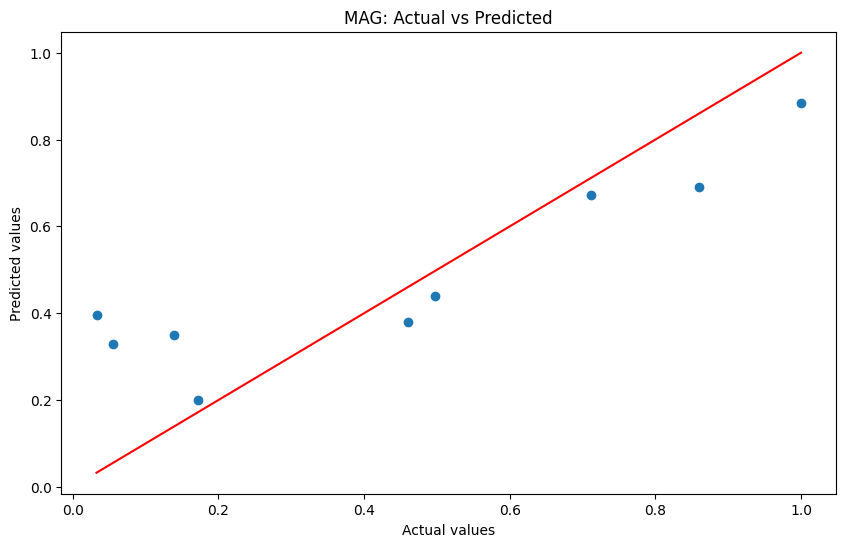

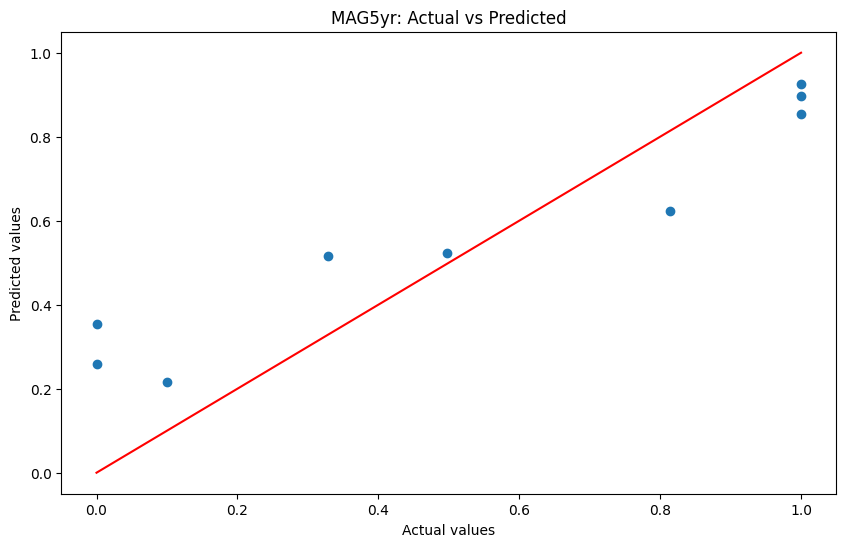

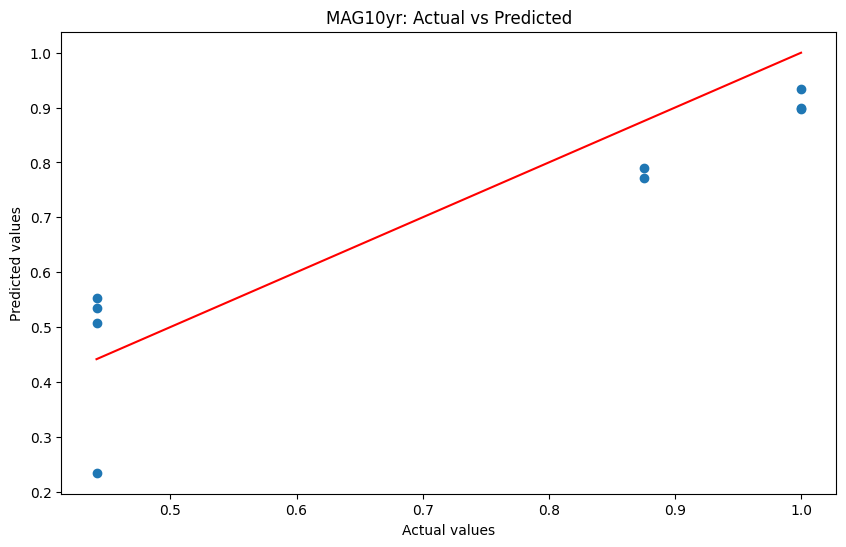

In [ ]:
import matplotlib.pyplot as plt

# Plot for MAG
plt.figure(figsize=(10,6))
plt.scatter(y_test_mag, mag_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('MAG: Actual vs Predicted')
plt.plot([min(y_test_mag), max(y_test_mag)], [min(y_test_mag), max(y_test_mag)], color='red') # a red line for perfect fit
plt.show()

# Plot for MAG5yr
plt.figure(figsize=(10,6))
plt.scatter(y_test_5, mag5_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('MAG5yr: Actual vs Predicted')
plt.plot([min(y_test_5), max(y_test_5)], [min(y_test_5), max(y_test_5)], color='red') # a red line for perfect fit
plt.show()

# Plot for MAG10yr
plt.figure(figsize=(10,6))
plt.scatter(y_test_10, mag10_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('MAG10yr: Actual vs Predicted')
plt.plot([min(y_test_10), max(y_test_10)], [min(y_test_10), max(y_test_10)], color='red') # a red line for perfect fit
plt.show()


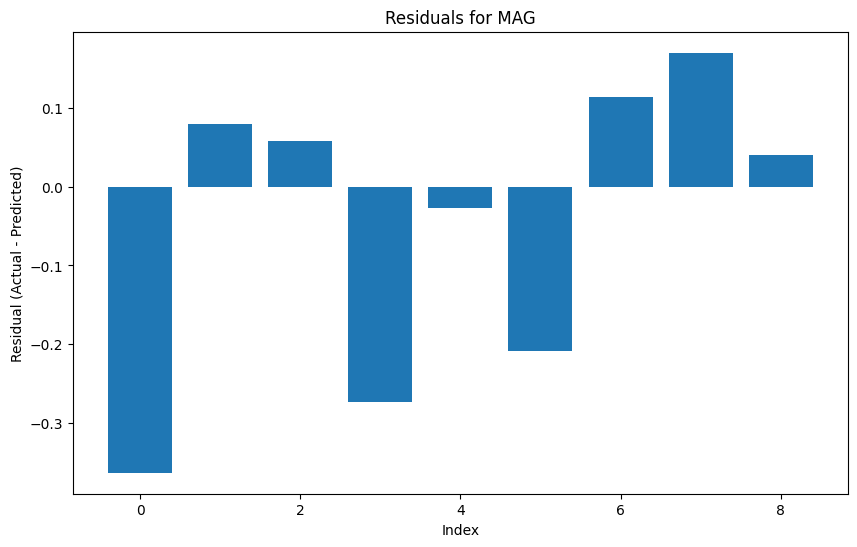

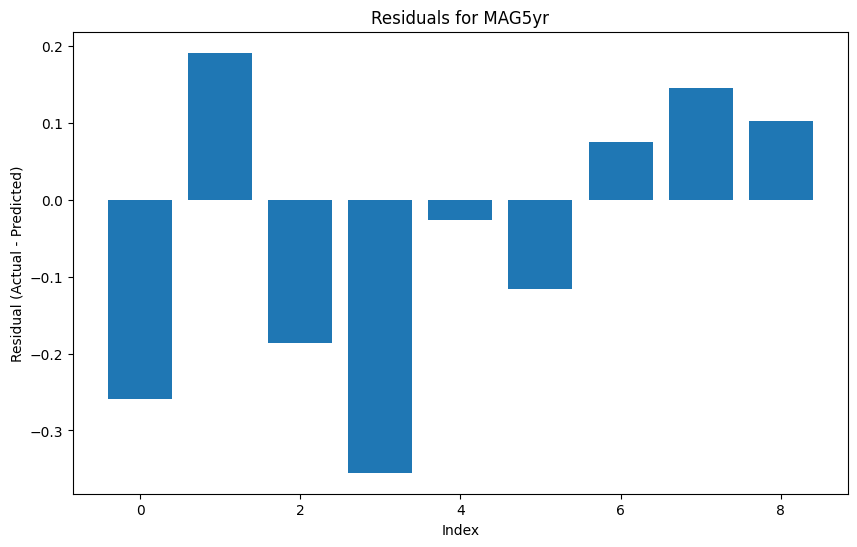

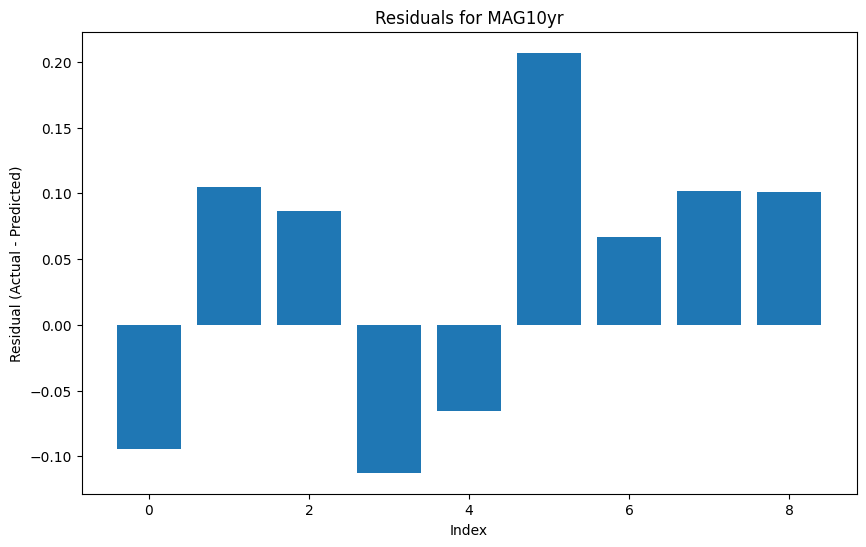

In [ ]:
# Residuals for MAG
plt.figure(figsize=(10,6))
plt.bar(range(len(y_test_mag)), y_test_mag - mag_pred)
plt.xlabel('Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals for MAG')
plt.show()

# Residuals for MAG5yr
plt.figure(figsize=(10,6))
plt.bar(range(len(y_test_5)), y_test_5 - mag5_pred)
plt.xlabel('Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals for MAG5yr')
plt.show()

# Residuals for MAG10yr
plt.figure(figsize=(10,6))
plt.bar(range(len(y_test_10)), y_test_10 - mag10_pred)
plt.xlabel('Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residuals for MAG10yr')
plt.show()
